In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#实例化
#训练集带入实例化后的模型去进行训练，使用的接口是fit
#使用其他的接口将测试集导入我们的训练好的模型，去获取我们的结果（score，Y_test）


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [7]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
#实例化,random_state=0是为了是模型更加稳定
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)

In [9]:
clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)

In [10]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [11]:
score_c=clf.score(Xtest,Ytest)
score_r=clf.score(Xtest,Ytest)
print("single Tree:{}".format(score_c))
print("random forest:{}".format(score_r))
#他们两者的结果会随着他们数据集的划分而出现不同，也可能相同

single Tree:0.9444444444444444
random forest:0.9444444444444444


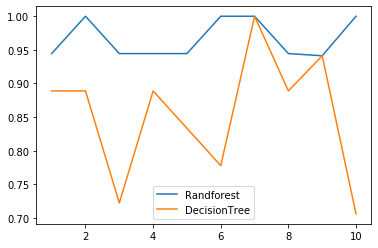

In [15]:
#交叉验证
rfc=RandomForestClassifier(n_estimators=25)
rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)

clf=DecisionTreeClassifier()
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label="Randforest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
max:0.9944444444444445,26,


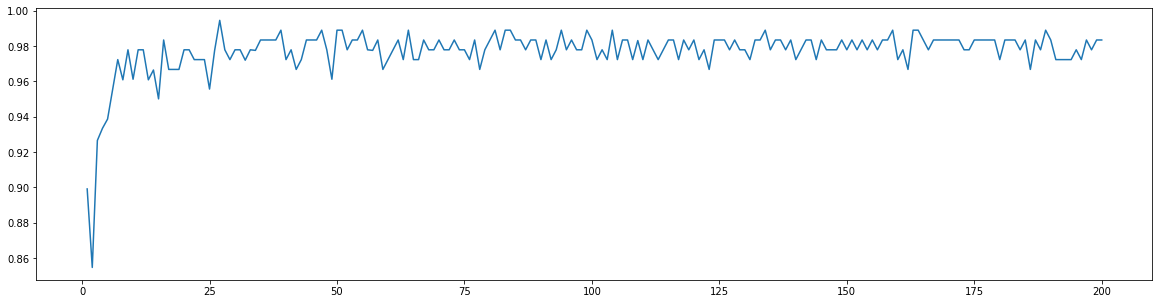

In [16]:
#n_estimators的学习曲线
rfc_scores=[]
for i in range(200):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_scores.append(rfc_s)
    if i%10==0:
        print(i)
print("max:{},{},".format(max(rfc_scores),rfc_scores.index(max(rfc_scores))))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),rfc_scores)
plt.show()
    

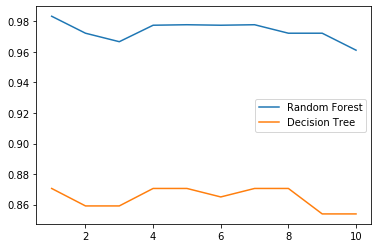

In [19]:
rfc_l=[]
clf_l=[]
for i in range(10):
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label="Random Forest")
plt.plot(range(1,11),clf_l,label="Decision Tree")
plt.legend()
plt.show()

In [22]:
#随机森林的错误概率
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [23]:
rfc=RandomForestClassifier(n_estimators=25,random_state=25)
rfc=rfc.fit(Xtrain,Ytrain)

In [24]:
rfc.estimators_[0].random_state

1589671044

In [25]:
#随机森林的重要属性之一：estimators,查看森林中树的状况
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1589671044
842096958
353376730
1860790415
1197604157
424446838
798482687
776635543
1765661612
646899634
504124157
1113162888
794434716
519300996
1879525209
752438525
241503135
1166320116
1576597957
1122081409
1728147623
1917730563
485506136
80444343
1919982851


In [26]:
#oob袋外数据测试
rfc=RandomForestClassifier(n_estimators=25,oob_score=True)
rfc=rfc.fit(wine.data,wine.target)

In [27]:
#oob_score_
rfc.oob_score_

0.9719101123595506

In [34]:
rfc=RandomForestClassifier(n_estimators=25)
rfc=rfc.fit(Xtrain,Ytrain)

In [35]:
rfc.score(Xtest,Ytest)

0.9814814814814815

In [40]:
rfc.feature_importances_
#特征权重

array([0.11488705, 0.03696391, 0.01180925, 0.01341235, 0.02282017,
       0.06427264, 0.15889568, 0.00936237, 0.01639525, 0.2445135 ,
       0.05595389, 0.10051632, 0.15019762])

In [37]:
rfc.apply(Xtest)
#获取当前样本在这棵树中所在的叶子节点所在的索引

array([[18, 16, 13, ...,  9, 16, 12],
       [ 9,  6,  2, ...,  1,  4,  8],
       [11, 15,  5, ...,  4,  5,  5],
       ...,
       [ 4,  3, 11, ...,  4, 11,  8],
       [ 4,  3,  5, ...,  4,  5,  8],
       [ 2,  3,  2, ...,  1,  4,  8]], dtype=int64)

In [38]:
rfc.predict(Xtest)

array([0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 2])

In [39]:
rfc.predict_proba(Xtest)

array([[1.  , 0.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.04, 0.96, 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.04, 0.  , 0.96],
       [0.08, 0.88, 0.04],
       [0.28, 0.56, 0.16],
       [0.96, 0.04, 0.  ],
       [0.68, 0.28, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.16, 0.8 ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.24, 0.64],
       [0.88, 0.12, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.44, 0.44, 0.12],
       [0.04, 0.84, 0.12],
       [0.  , 1.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 1.  , 0.  ],
       [0.12, 0.88, 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.76, 0.24],
       [0.92, 0.08, 0.  ],
       [0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  ],
 

In [42]:
rfc.score(Xtest,Ytest)

0.9814814814814815

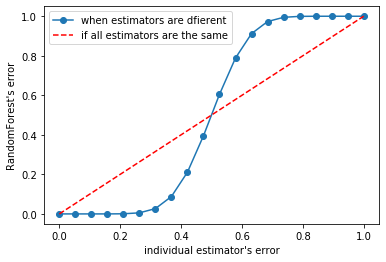

In [43]:
#随机森林单个树的错误概率必须小于0.5
#如果分类器的错误概率小于0.5那么会比same的准确率高
#可通过画图来查看证明
x=np.linspace(0,1,20)
y=[]

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)

plt.plot(x,y,"o-",label="when estimators are dfierent")
plt.plot(x,x,"--",color="red",label="if all estimators are the same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()
